In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sp_tracks = pd.read_csv('tracks.csv')
sp_artists = pd.read_csv('/content/artists.csv')

 we aim to identify patterns in music preferences, the relationship between different song features (like tempo, danceability, and acousticness), and trends over time. The ultimate goal is to provide actionable insights into the music industry and consumer listening habits.

In [3]:
sp_tracks.head(10) #tracks_data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [4]:
sp_artists.head(10) #artists_data

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


In [5]:
sp_tracks.isnull().sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [6]:
sp_artists.isnull().sum()

,0
id,0
followers,13
genres,0
name,3
popularity,0


In [9]:
# Re-imputing missing values in sp_tracks
sp_tracks['name'] = sp_tracks['name'].fillna(value='Unknown')

# Re-imputing missing values in sp_artists
sp_artists['followers'] = sp_artists['followers'].fillna(sp_artists['followers'].median())
sp_artists['name'] = sp_artists['name'].fillna(value='Unknown')

print("Missing values in sp_tracks after re-imputation:")
display(sp_tracks.isnull().sum())

print("\nMissing values in sp_artists after re-imputation:")
display(sp_artists.isnull().sum())

Missing values in sp_tracks after re-imputation:


,0
id,0
name,0
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0



Missing values in sp_artists after re-imputation:


,0
id,0
followers,0
genres,0
name,0
popularity,0


In [7]:
print("Missing values in sp_tracks after all imputations:")
display(sp_tracks.isnull().sum())

Missing values in sp_tracks after all imputations:


,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [8]:
print("Missing values in sp_artists after all imputations:")
display(sp_artists.isnull().sum())

Missing values in sp_artists after all imputations:


,0
id,0
followers,13
genres,0
name,3
popularity,0


In [8]:
sp_artists['followers'] = sp_artists['followers'].fillna(sp_artists['followers'].median())
sp_artists['popularity'] = sp_artists['popularity'].fillna(sp_artists['popularity'].median())
sp_artists['genres'] = sp_artists['genres'].fillna(value='[]') # Assuming genres are stored as string representation of lists
sp_artists['name'] = sp_artists['name'].fillna(value='Unknown')

print("Missing values after imputation in sp_artists:")
display(sp_artists.isnull().sum())

Missing values after imputation in sp_artists:


,0
id,0
followers,0
genres,0
name,0
popularity,0


In [10]:
sp_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586672 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [11]:
sp_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104349 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [12]:
sp_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


### Top 10 Popular Songs

In [13]:
top_10_popular_songs = sp_tracks.sort_values(by='popularity', ascending=False).head(10)
display(top_10_popular_songs[['name', 'artists', 'popularity']])

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,['Masked Wolf'],98
92810,Save Your Tears,['The Weeknd'],97
92811,telepatía,['Kali Uchis'],97
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
92813,Blinding Lights,['The Weeknd'],96
92814,The Business,['Tiësto'],95
92819,Bandido,"['Myke Towers', 'Juhn']",94
91866,Streets,['Doja Cat'],94


### Least 10 Popular Songs

In [14]:
least_10_popular_songs = sp_tracks.sort_values(by='popularity', ascending=True).head(10)
display(least_10_popular_songs[['name', 'artists', 'popularity']])

,name,artists,popularity
135236,My Wubba Dolly,['Lew Stone'],0
135230,In The Royal Hawaiian Hotel,['The Nite Owls'],0
135229,Am I Dreaming?,"['Tommy Dorsey', 'The Clambake 7']",0
135228,Movin' the boogie,"['Pete Johnson', 'Albert Ammons']",0
135227,Alibi Baby,"['Tommy Dorsey', 'The Clambake 7']",0
135226,If somebody would only love me,"['Jelly Roll Morton and his Orchestra', 'Jelly...",0
135225,If the Man In the Moon Were a Coon,"['Tommy Dorsey', 'The Clambake 7']",0
135224,It All Comes Back to Me Now,"['June Robbing', 'Eddy Duchin']",0
135223,Hyena stomp,"['Jelly Roll Morton and his Orchestra', 'Jelly...",0
135222,Now You've Got Me Worryin' for You,"['Lew Sherwood', 'Eddy Duchin']",0


In [15]:
sp_tracks['release_date'] = pd.to_datetime(sp_tracks['release_date'], format='mixed', errors='coerce')
sp_tracks.set_index('release_date', inplace=True)

print("DataFrame info after setting 'release_date' as index:")
display(sp_tracks.info())

DataFrame info after setting 'release_date' as index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586672 entries, 1922-02-22 to 2015-07-01
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586672 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   danceability      586672 non-null  float64
 8   energy            586672 non-null  float64
 9   key               586672 non-null  int64  
 10  loudness          586672 non-null  float64
 11  mode              586672 non-null  int64  
 12  speechiness       586672 non-null  float64
 13  acousticness      586672 non-null  float64
 14  instrumentalness  586672 non-null  float64
 15

None

In [16]:
sp_tracks['duration'] = sp_tracks['duration_ms'] / 1000
display(sp_tracks[['duration_ms', 'duration']].head())

,duration_ms,duration
release_date,,
1922-02-22,126903,126.903
1922-06-01,98200,98.200
1922-03-21,181640,181.640
1922-03-21,176907,176.907
1922-01-01,163080,163.080


In [17]:
if 'duration_ms' in sp_tracks.columns:
    sp_tracks['duration'] = sp_tracks['duration_ms'].apply (lambda x : round(x/1000))
    sp_tracks.drop('duration_ms', inplace = True, axis=1)
else:
    print("Column 'duration_ms' not found. Assuming conversion was already done or not needed.")
display(sp_tracks.head())

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [18]:
sp_tracks_sample = sp_tracks.sample(frac=0.05, random_state=42) # random_state for reproducibility
print(f"Original dataset size: {len(sp_tracks)} rows")
print(f"Sampled dataset size: {len(sp_tracks_sample)} rows (5% of original)")
display(sp_tracks_sample.head())

Original dataset size: 586672 rows
Sampled dataset size: 29334 rows (5% of original)


,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1985-01-01,0rTUAMd7huYjda84aceuzl,Дети проходных дворов,21,0,['Kino'],['2jkl2xJVm71azWAgZKyf42'],0.890,0.6680,9,-10.044,0,0.0533,0.570,0.000002,0.0591,0.942,137.934,4,105
2017-08-25,4bMy8NjgkVHize43OSrChu,95,37,0,['Picture This'],['7jLSEPYCYQ5ssWU3BICqrW'],0.663,0.5510,1,-6.445,1,0.0280,0.697,0.000000,0.1800,0.339,128.992,4,235
1992-01-01,4X1xn2bjxlaLbx6o3jSEXj,As almal ver is,10,0,['Koos Du Plessis'],['4utxbudXUuseiCfVJ0B2xM'],0.376,0.0979,2,-18.280,1,0.0350,0.485,0.000577,0.1150,0.236,90.290,3,148
1969-01-01,3ZwzDf7V1xlAS9WWuviqIm,"Il tuo mondo (Nono, dobri moj nono)",29,0,['Claudio Villa'],['2r4iOKmxTQU9s361Yt3gq1'],0.565,0.3270,5,-13.843,1,0.0295,0.781,0.000011,0.1310,0.556,103.256,3,194
2015-12-25,712Hktc9DnU5u9uOSn1q1Y,Bazaar - Official Sunburn Goa 2015 Anthem,55,0,"['KSHMR', 'Marnik']","['2wX6xSig4Rig5kZU6ePlWe', '6S3KljEiIOWoLMUyZr...",0.582,0.9790,11,-2.492,0,0.0714,0.125,0.001520,0.3390,0.196,128.010,4,172


# Task
To understand the relationships and distributions among various audio features and song popularity, generate a `seaborn.pairplot` using the `sp_tracks_sample` DataFrame. The plot should include the features 'popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', and 'duration'. Ensure that the `duration` column (in seconds) is created from `duration_ms` before generating the plot.

### Regression Plot: Loudness vs. Energy

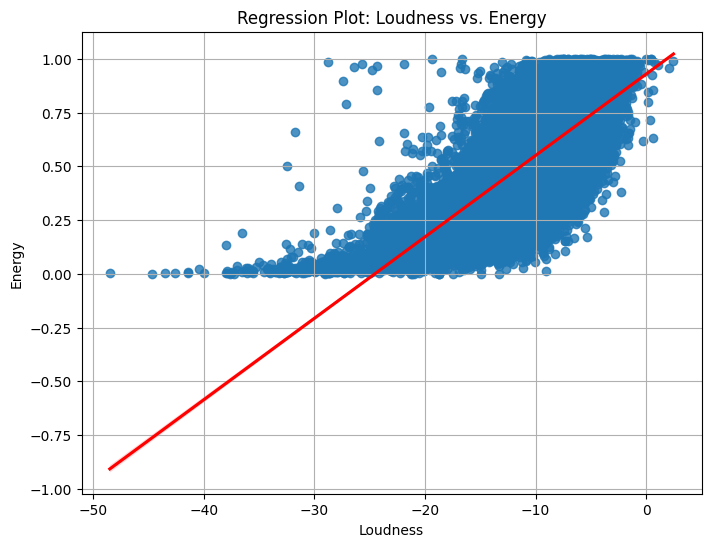

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sp_tracks_sample, x='loudness', y='energy', line_kws={"color":"red"})
plt.title('Regression Plot: Loudness vs. Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

### Regression Plot: Popularity vs. Acousticness

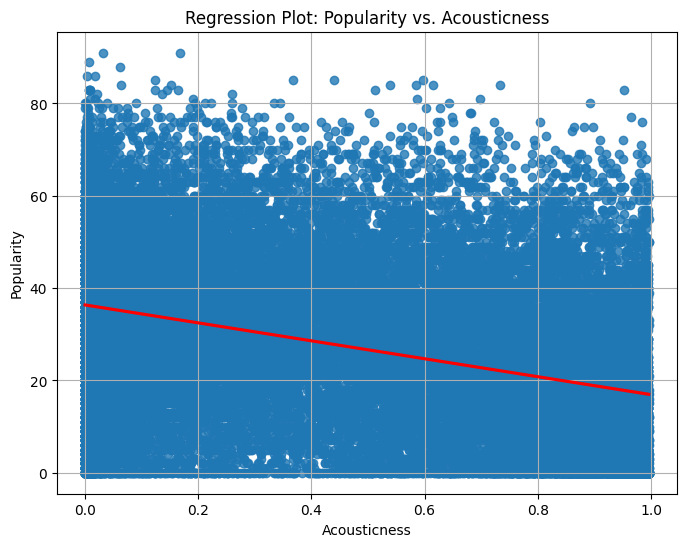

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sp_tracks_sample, x='acousticness', y='popularity', line_kws={"color":"red"})
plt.title('Regression Plot: Popularity vs. Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [21]:
sp_tracks['dates'] = sp_tracks.index.get_level_values('release_date')
sp_tracks.dates = pd.to_datetime(sp_tracks.dates)
years = sp_tracks.dates.dt.year
display(sp_tracks.head())

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-06-01
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01


## Select Features for Pair Plot

### Subtask:
Select a subset of numerical features from the `sp_tracks_sample` DataFrame that are relevant for understanding audio characteristics and popularity. These will include 'popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', and 'duration'.


**Reasoning**:
To select the specified numerical features from the `sp_tracks_sample` DataFrame and create a new DataFrame `df_features` as instructed.



In [22]:
df_features = sp_tracks_sample[['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration']]
print("Selected features for pair plot:")
display(df_features.head())

Selected features for pair plot:


,popularity,danceability,energy,loudness,valence,tempo,duration
release_date,,,,,,,
1985-01-01,21,0.890,0.6680,-10.044,0.942,137.934,105
2017-08-25,37,0.663,0.5510,-6.445,0.339,128.992,235
1992-01-01,10,0.376,0.0979,-18.280,0.236,90.290,148
1969-01-01,29,0.565,0.3270,-13.843,0.556,103.256,194
2015-12-25,55,0.582,0.9790,-2.492,0.196,128.010,172


**Reasoning**:
Now that the relevant features have been selected and stored in `df_features`, the next step is to generate the `seaborn.pairplot` to visualize the relationships and distributions among these features as specified in the main task.



<Figure size 1000x1000 with 0 Axes>

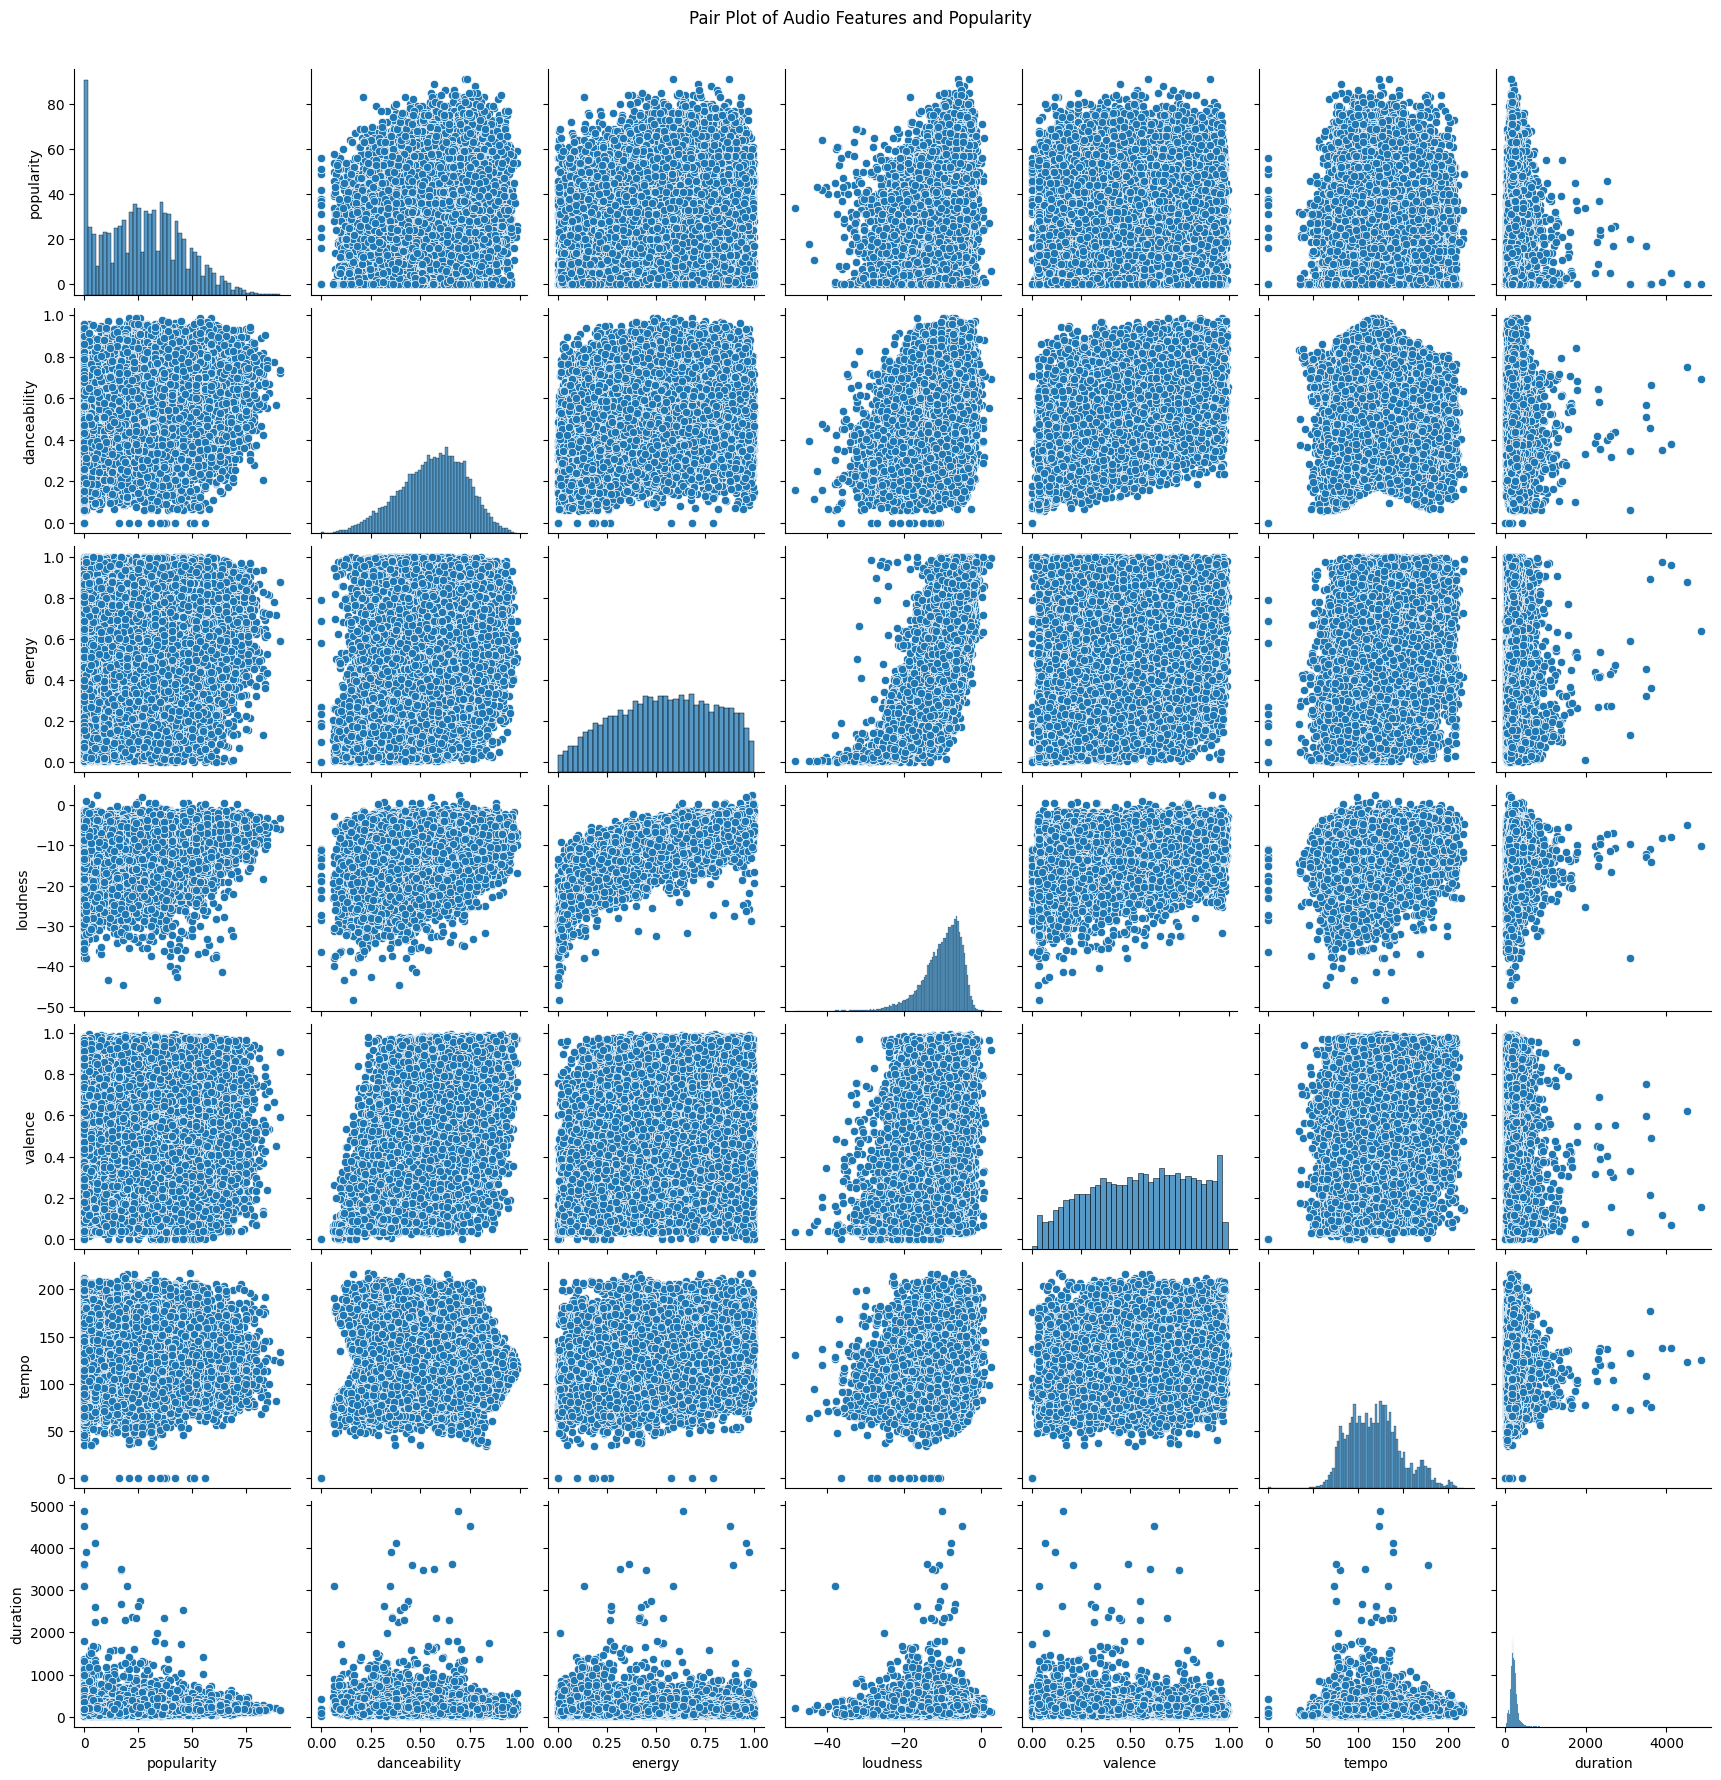

In [23]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_features)
plt.suptitle('Pair Plot of Audio Features and Popularity', y=1.02)
plt.show()

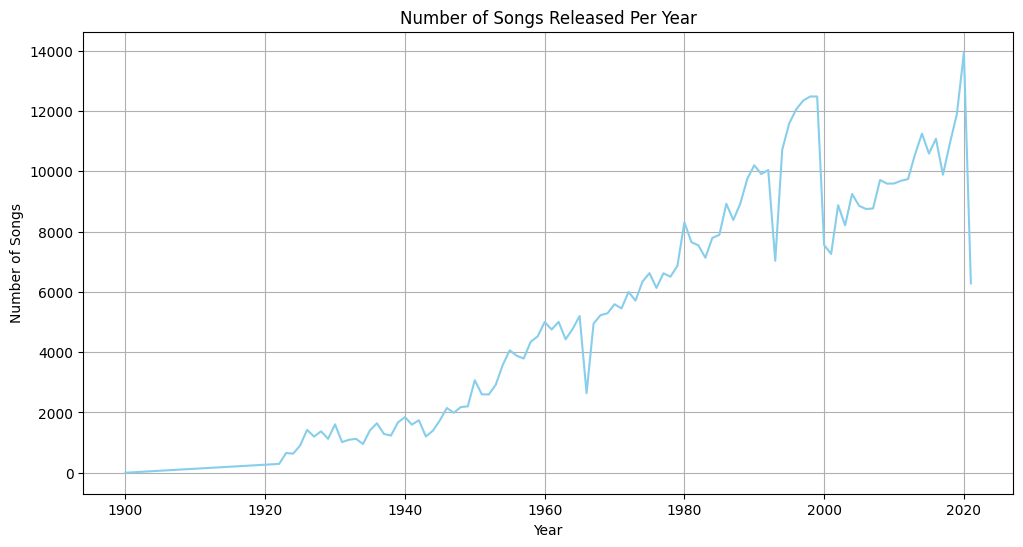

In [24]:
# Number of songs released per year (Line Plot)
songs_per_year = years.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, color='skyblue')
plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()



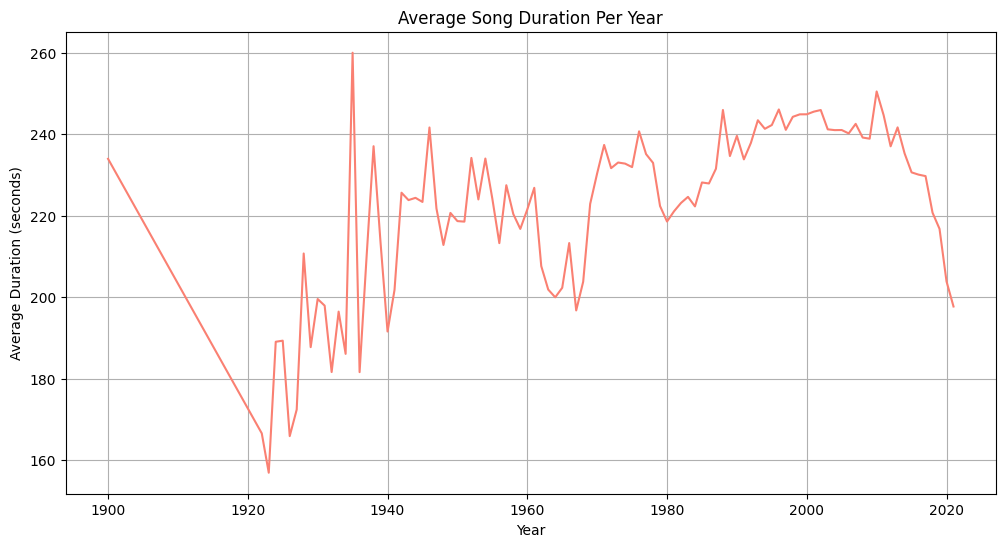

In [25]:
#Average song duration per year (Line Plot)
average_duration_per_year = sp_tracks.groupby(years)['duration'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_per_year.index, y=average_duration_per_year.values, color='salmon')
plt.title('Average Song Duration Per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

In [26]:
sp_tracks['id_artists_clean'] = sp_tracks['id_artists'].str.strip("[]'").str.split(', ').str[0].str.strip("'")
merged_df = sp_tracks.merge(sp_artists[['id', 'genres']], left_on='id_artists_clean', right_on='id', how='left')
display(merged_df.head())

,id_x,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,duration,dates,id_artists_clean,id_y,genres
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.7440,0.151,0.127,104.851,3,127,1922-02-22,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,[]
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.0000,0.148,0.655,102.009,1,98,1922-06-01,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0218,0.212,0.457,130.418,5,182,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.9180,0.104,0.397,169.980,3,177,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.1300,0.311,0.196,103.220,4,163,1922-01-01,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,"['adult standards', 'big band', 'easy listenin..."


In [27]:
import ast

# Convert string representation of lists to actual lists
# Handle potential non-string values or malformed strings gracefully
merged_df['genres'] = merged_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') and x.endswith(']') else [])

# Explode the genres list so each genre gets its own row
merged_df_exploded = merged_df.explode('genres')

# Filter out NaN values that result from empty lists after explode
merged_df_processed = merged_df_exploded.dropna(subset=['genres'])

print("Processed merged_df with exploded genres:")
display(merged_df_processed.head())

Processed merged_df with exploded genres:


,id_x,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,duration,dates,id_artists_clean,id_y,genres
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0218,0.212,0.457,130.418,5,182,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,tango
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0218,0.212,0.457,130.418,5,182,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,vintage tango
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.9180,0.104,0.397,169.980,3,177,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,tango
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.9180,0.104,0.397,169.980,3,177,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,vintage tango
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.1300,0.311,0.196,103.220,4,163,1922-01-01,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,adult standards


In [29]:
genre_duration = merged_df_processed.groupby('genres')['duration'].sum().sort_values(ascending=False).reset_index()

top_genres = genre_duration.head(10)
display(genre_duration.head(10))

,genres,duration
0,rock,8080498
1,classic rock,5908144
2,classical,5320150
3,filmi,5176075
4,adult standards,4981713
5,album rock,4716692
6,mellow gold,4610362
7,soft rock,4261302
8,art rock,3433469
9,latin,3366427


/tmp/ipython-input-3320462863.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres', y='duration', data=top_10_genre_duration, palette='viridis')


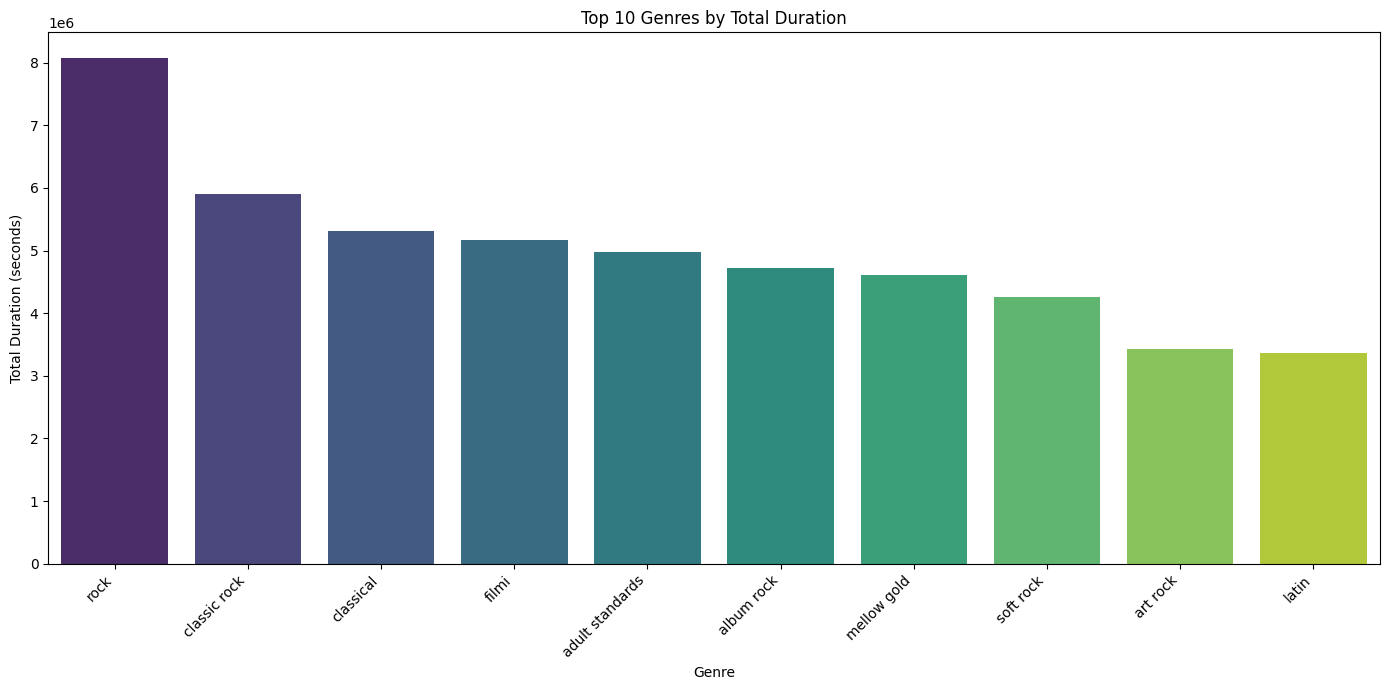

/tmp/ipython-input-3320462863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres', y='popularity', data=top_10_genre_popularity, palette='magma')


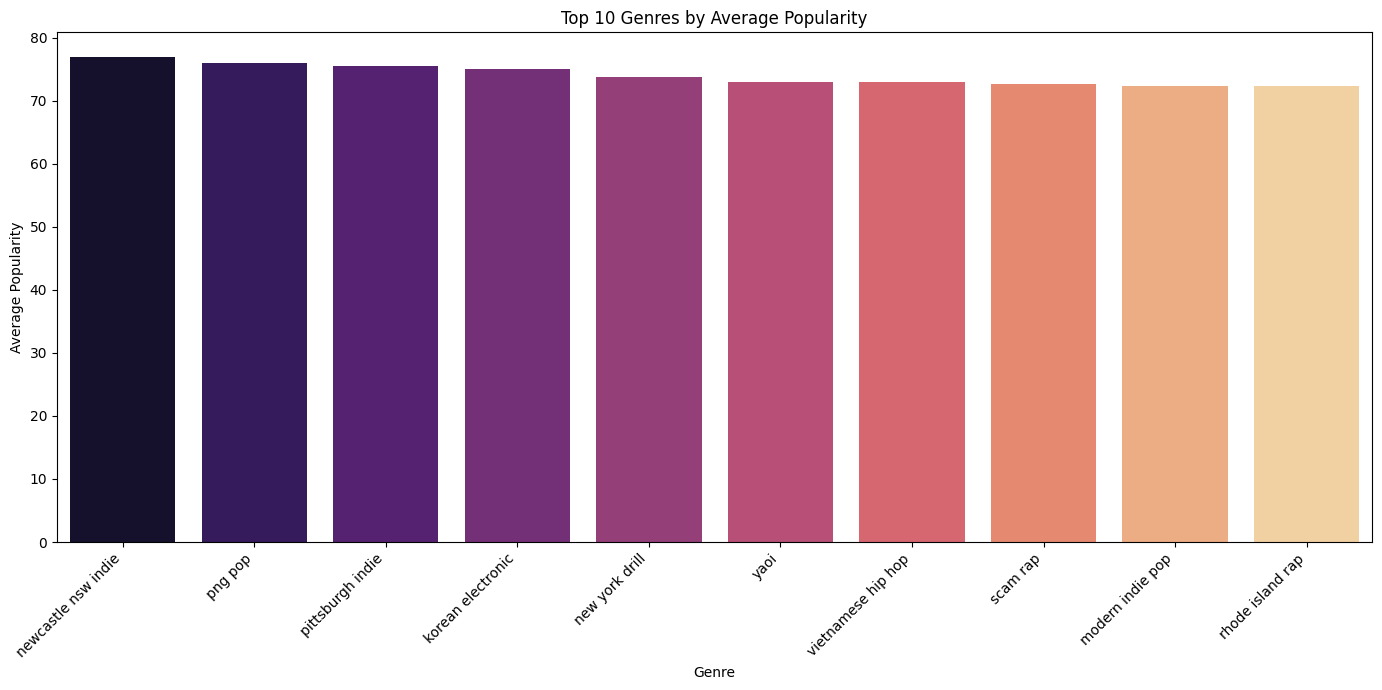

In [30]:
# Calculate average popularity per genre
genre_popularity = merged_df_processed.groupby('genres')['popularity'].mean().sort_values(ascending=False).reset_index()

# Get top 10 genres by total duration
top_10_genre_duration = genre_duration.head(10)

# Get top 10 genres by average popularity
top_10_genre_popularity = genre_popularity.head(10)

# Bar plot for Top 10 Genres by Total Duration
plt.figure(figsize=(14, 7))
sns.barplot(x='genres', y='duration', data=top_10_genre_duration, palette='viridis')
plt.title('Top 10 Genres by Total Duration')
plt.xlabel('Genre')
plt.ylabel('Total Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for Top 10 Genres by Average Popularity
plt.figure(figsize=(14, 7))
sns.barplot(x='genres', y='popularity', data=top_10_genre_popularity, palette='magma')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the pair plot regarding the relationships and distributions of the selected audio features and song popularity.


## Summary:

### Data Analysis Key Findings

*   A dedicated DataFrame, `df_features`, was successfully created containing the specified numerical audio features: 'popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', and 'duration'.
*   A `seaborn.pairplot` was successfully generated using the `df_features` DataFrame, visualizing the relationships and distributions among these selected audio features and song popularity.

### Insights or Next Steps

*   The generated pair plot is ready for visual inspection to identify potential correlations between audio features and song popularity, as well as to understand the individual distributions of each feature.
*   The next step would involve a detailed visual analysis of the pair plot to extract specific insights regarding positive, negative, or non-linear relationships between features, and to observe any skewness or multi-modality in the feature distributions.
